In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import aux_functions as aux

sns.set_theme()

In [2]:
df = pd.read_csv('../data.csv')
print('Amostras: {} \nColunas: {}'.format(df.shape[0], df.shape[1]))

Amostras: 880 
Colunas: 68


### Provando a precisão da velocidade obtida pelo FFT do tacômetro

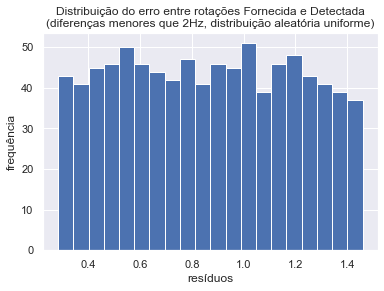

In [3]:
# distribuição do erro
plt.hist(df['rotacao_manual']-df['rotacao_calc'],20)
plt.title('Distribuição do erro entre rotações Fornecida e Detectada'+ 
          '\n(diferenças menores que 2Hz, distribuição aleatória uniforme)')
plt.xlabel('resíduos')
plt.ylabel('frequência')
plt.show()

# remove coluna de 'rotacao_manual', que é redundante con 'rotacao_calc'
df.pop('rotacao_manual');

In [4]:
# mapeia velocidade em intervalos decimais
decimals = (pd.cut(df['rotacao_calc'], bins=[0,15,25,35,45,55,65], labels=False)+1)*10
df.insert(3, 'rotacao_calc_aprox', decimals)

# filtra velocidades acima de 30 Hz
df = df.query('rotacao_calc > 30')

# Organizando as features por categoria e por eixo

In [5]:
# mapeia cada categoria de feature para suas instâncias
columns = list(df.columns)
feat_type = {
    'harmonico 1': [col for col in columns if '1h' in col],
    'harmonico 2': [col for col in columns if '2h' in col],
    'harmonico 3': [col for col in columns if '3h' in col],
    'entropia':    [col for col in columns if 'entr' in col],
    'curtose':     [col for col in columns if 'kurt' in col],
    'media':       [col for col in columns if 'mean' in col],
    'RMS':         [col for col in columns if '1_rms' in col or '2_rms' in col or 'e_rms' in col],
    'RMS da vel':  [col for col in columns if 'vel_rms' in col],
    'fase':        [col for col in columns if 'phase' in col],
    # 'descritivos': ['condicao', severidade, 'rotacao_manual', 'rotacao_calc'],
}

# faz o mapeamento inverso, do nome de cada feature para a sua categoria
feat_to_type = {v[i]: k for k, v in feat_type.items() for i in range(len(v))}

# mostra cada feature
listed =[]
for k,i in feat_type.items():
    k = k +': '
    print('{:>13}'.format(k), i)
    listed.extend(i)

# mosta todas as outras colunas
print('{:>13}'.format('descritivos: '), [i for i in df.columns if i not in listed])

harmonico 1:  ['ax1_1h', 'ax2_1h', 'rad1_1h', 'rad2_1h', 'tg1_1h', 'tg2_1h']
harmonico 2:  ['ax1_2h', 'ax2_2h', 'rad1_2h', 'rad2_2h', 'tg1_2h', 'tg2_2h']
harmonico 3:  ['ax1_3h', 'ax2_3h', 'rad1_3h', 'rad2_3h', 'tg1_3h', 'tg2_3h']
   entropia:  ['ax1_entr', 'ax2_entr', 'microfone_entr', 'rad1_entr', 'rad2_entr', 'tg1_entr', 'tg2_entr']
    curtose:  ['ax1_kurt', 'ax2_kurt', 'microfone_kurt', 'rad1_kurt', 'rad2_kurt', 'tg1_kurt', 'tg2_kurt']
      media:  []
        RMS:  ['ax1_rms', 'ax2_rms', 'microfone_rms', 'rad1_rms', 'rad2_rms', 'tg1_rms', 'tg2_rms']
 RMS da vel:  ['ax1_vel_rms', 'ax2_vel_rms', 'rad1_vel_rms', 'rad2_vel_rms', 'tg1_vel_rms', 'tg2_vel_rms']
       fase:  ['ax1_phase', 'ax2_phase', 'freq_ax_phase', 'rad1_phase', 'rad2_phase', 'tg1_phase', 'tg2_phase']
descritivos:  ['condicao', 'severidade', 'rotacao_calc', 'rotacao_calc_aprox', 'ax1_4h', 'ax1_5h', 'ax2_4h', 'ax2_5h', 'rad1_4h', 'rad1_5h', 'rad2_4h', 'rad2_5h', 'tg1_4h', 'tg1_5h', 'tg2_4h', 'tg2_5h']


In [6]:
# mapeia cada eixo de captação para suas instâncias
eixo = {
    'axial':     [col for col in columns if 'ax' in col],
    'radial':    [col for col in columns if 'rad' in col],
    'tangente':  [col for col in columns if 'tg' in col],
    'microfone': [col for col in columns if 'mic' in col],
}

# faz o mapeamento inverso, do nome de cada feature para o seu eixo
feat_to_eixo = {v[i]: k for k, v in eixo.items() for i in range(len(v))}

# mostra cada feature
listed =[]
for k,i in eixo.items():
    k = k +': '
    print('{:>11}'.format(k), i[:7], '\n           ', i[7:], '\n')
    listed.extend(i)

    axial:  ['ax1_1h', 'ax1_2h', 'ax1_3h', 'ax1_4h', 'ax1_5h', 'ax1_entr', 'ax1_kurt'] 
            ['ax1_phase', 'ax1_rms', 'ax1_vel_rms', 'ax2_1h', 'ax2_2h', 'ax2_3h', 'ax2_4h', 'ax2_5h', 'ax2_entr', 'ax2_kurt', 'ax2_phase', 'ax2_rms', 'ax2_vel_rms', 'freq_ax_phase'] 

   radial:  ['rad1_1h', 'rad1_2h', 'rad1_3h', 'rad1_4h', 'rad1_5h', 'rad1_entr', 'rad1_kurt'] 
            ['rad1_phase', 'rad1_rms', 'rad1_vel_rms', 'rad2_1h', 'rad2_2h', 'rad2_3h', 'rad2_4h', 'rad2_5h', 'rad2_entr', 'rad2_kurt', 'rad2_phase', 'rad2_rms', 'rad2_vel_rms'] 

 tangente:  ['tg1_1h', 'tg1_2h', 'tg1_3h', 'tg1_4h', 'tg1_5h', 'tg1_entr', 'tg1_kurt'] 
            ['tg1_phase', 'tg1_rms', 'tg1_vel_rms', 'tg2_1h', 'tg2_2h', 'tg2_3h', 'tg2_4h', 'tg2_5h', 'tg2_entr', 'tg2_kurt', 'tg2_phase', 'tg2_rms', 'tg2_vel_rms'] 

microfone:  ['microfone_entr', 'microfone_kurt', 'microfone_rms'] 
            [] 



O primeiro procedimento é separar os conjuntos.

In [7]:
# conta número de samples para cada condicao
df['condicao'].value_counts()

imbalance                  205
vertical-misalignment      187
horizontal-misalignment    123
normal                      30
Name: condicao, dtype: int64

Será averiguada a relvância da normalização das variáveis em relação à velocidade de rotação de cada ensaio.

In [8]:
# gera cópia profunda para alterar os valores internos sem corromper originais
df_norm = df.copy(deep=True)

# normaliza cada um por 1/rotacao_calc
df_norm.iloc[:, 4:] = df.iloc[:, 4:].div(df['rotacao_calc'], axis=0)

In [9]:
df.query("condicao == 'imbalance' or condicao == 'normal'")

,condicao,severidade,rotacao_calc,rotacao_calc_aprox,ax1_1h,ax1_2h,ax1_3h,ax1_4h,ax1_5h,ax1_entr,...,tg2_1h,tg2_2h,tg2_3h,tg2_4h,tg2_5h,tg2_entr,tg2_kurt,tg2_phase,tg2_rms,tg2_vel_rms
516,imbalance,10.0,31.0,30,19.250041,2.991936,15.342639,2.846578,9.384263,4.059423,...,8.362220,6.769291,6.233548,3.106891,4.936569,4.073156,0.161771,0.000000,82.324912,224.100204
517,imbalance,10.0,32.0,30,20.985573,0.849873,13.544377,3.265885,3.637502,4.013990,...,11.543725,4.297387,5.277381,3.282156,3.058000,4.080218,-0.034663,-3.141593,69.953438,391.047177
518,imbalance,10.0,32.8,30,20.352680,2.336111,14.343372,2.936342,5.375789,4.048610,...,10.711867,5.514618,5.931727,2.740901,3.602889,4.136297,-0.316062,0.000000,81.794472,313.574670
519,imbalance,10.0,33.6,30,21.093277,1.641858,12.373513,2.208417,8.450007,4.005612,...,10.794463,4.439018,5.282265,3.070806,3.310766,4.313425,-0.545828,0.000000,112.249634,290.335618
520,imbalance,10.0,35.2,40,28.739751,1.633362,16.293327,3.703315,17.384094,4.028404,...,18.495487,6.456790,4.932072,5.594728,2.878913,4.032326,0.420700,0.000000,78.623845,377.467225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,normal,0.0,56.6,60,16.818741,3.397795,13.139224,11.970413,3.703108,4.056719,...,18.556028,2.345158,7.361358,4.770895,0.737864,3.976078,0.198166,0.000000,68.224698,145.741760
876,normal,0.0,57.4,60,11.348093,3.977927,10.441527,14.590291,2.165323,4.046336,...,12.284815,2.541270,5.466092,7.998642,0.230162,3.987833,0.011079,0.000000,80.577194,131.640342
877,normal,0.0,58.2,60,13.832032,13.850725,16.122160,8.686296,2.484079,4.041272,...,15.453647,3.694836,7.625946,5.743561,1.058408,4.178607,-0.214525,0.000000,105.345879,141.583523
878,normal,0.0,59.0,60,18.069033,15.682552,13.801789,8.011323,1.919863,3.963013,...,18.287953,4.636464,4.965762,7.656513,2.815881,4.240076,-0.638027,0.000000,124.509295,147.243423


In [10]:
# separa cada tipo de condicao em um dataframe específico
df_desbal      =      df.query("condicao == 'imbalance' or condicao == 'normal'")
df_des_ve      =      df.query("condicao == 'vertical-misalignment' or condicao == 'normal'")
df_des_ho      =      df.query("condicao == 'horizontal-misalignment' or condicao == 'normal'")

# cria dicionário que aponta o nome do condicao para o seu DataFrame
fault_to_df = {
    'imbalance'         :   df_desbal,
    'vertical-misalignment'  :   df_des_ve,
    'horizontal-misalignment':   df_des_ho,
}


# repete as operações para df normalizado
df_desbal_norm = df_norm.query("condicao == 'imbalance' or condicao == 'normal'")
df_des_ve_norm = df_norm.query("condicao == 'vertical-misalignment' or condicao == 'normal'")
df_des_ho_norm = df_norm.query("condicao == 'horizontal-misalignment' or condicao == 'normal'")

fault_to_normalized_df = {
    'imbalance'         :   df_desbal_norm,
    'vertical-misalignment'  :   df_des_ve_norm,
    'horizontal-misalignment':   df_des_ho_norm,
}

In [11]:
# descarta a coluna 'condicao' de cada df, pois é informação redundante
for _, dfram in fault_to_df.items():
    dfram.pop('condicao')
for _, dfram in fault_to_normalized_df.items():
    dfram.pop('condicao')
    
fault_to_df['vertical-misalignment'].head()

,severidade,rotacao_calc,rotacao_calc_aprox,ax1_1h,ax1_2h,ax1_3h,ax1_4h,ax1_5h,ax1_entr,ax1_kurt,...,tg2_1h,tg2_2h,tg2_3h,tg2_4h,tg2_5h,tg2_entr,tg2_kurt,tg2_phase,tg2_rms,tg2_vel_rms
216,0.51,30.8,30,18.589909,0.474162,19.047017,1.101274,2.427017,4.010161,0.247336,...,9.261043,3.209825,4.718671,4.921080,1.700798,4.181102,-0.397569,-3.141593,72.058181,157.870260
217,0.51,31.6,30,20.206224,1.225907,15.426892,0.968810,3.090569,4.005075,0.249991,...,12.363878,4.039801,4.463995,3.296196,2.800236,4.184440,-0.190465,0.000000,74.230246,401.066621
218,0.51,32.6,30,18.538231,1.827461,16.473923,1.648452,3.896317,4.049071,0.191672,...,14.888329,3.838293,4.828285,4.416639,2.100101,4.133516,-0.169751,-3.141593,76.295549,334.138921
219,0.51,33.4,30,12.779629,1.755495,14.531698,2.159146,4.104280,4.072042,0.237702,...,9.928871,5.317758,2.330487,2.907577,0.692310,4.262574,-0.599025,-3.141593,79.678944,297.175662
220,0.51,34.4,30,18.572563,1.257998,15.725616,1.815200,4.445427,4.081853,0.293934,...,15.313859,3.953589,3.682115,1.312005,2.075460,4.169022,-0.269299,-3.141593,67.295582,242.836218


# Análise de correlação

## imbalance

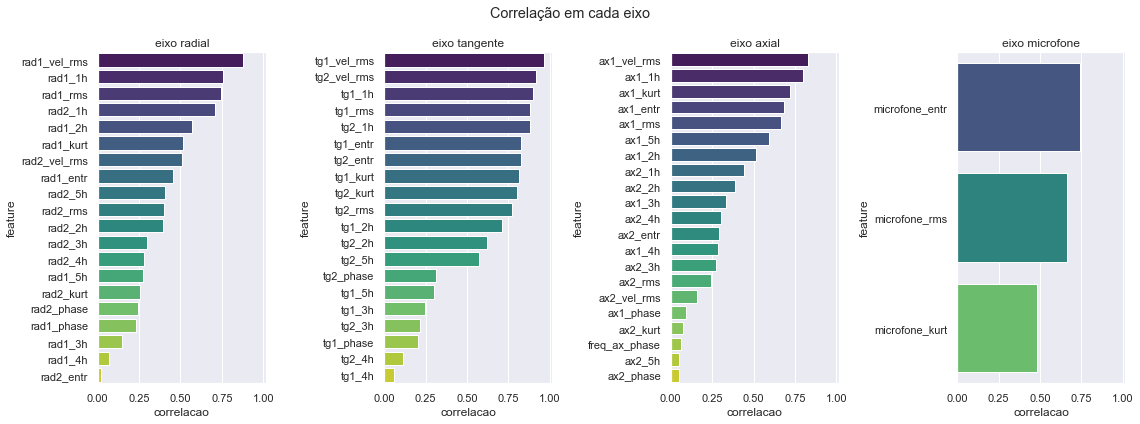

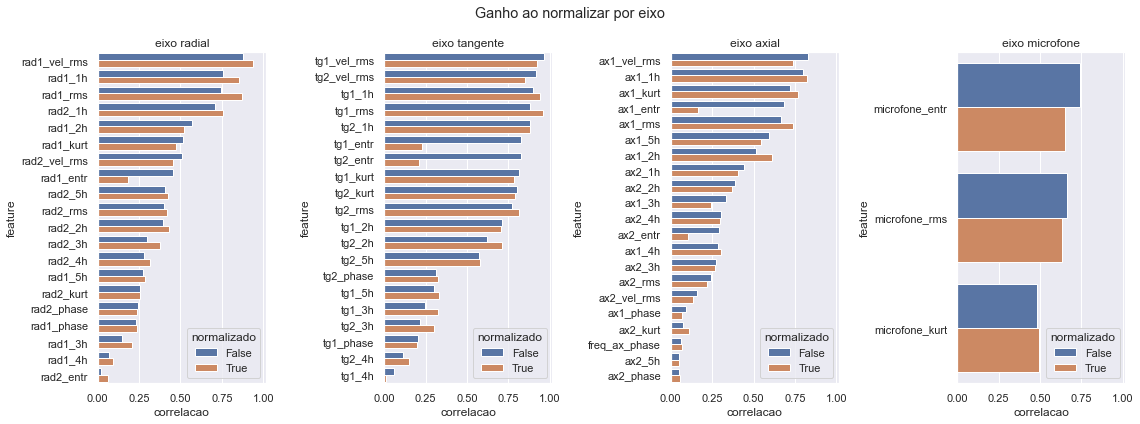

In [12]:
corr_df = aux.gera_corr_df('imbalance', df_desbal, df_desbal_norm, feat_to_eixo, feat_to_type)

aux.plot_correlations(corr_df)

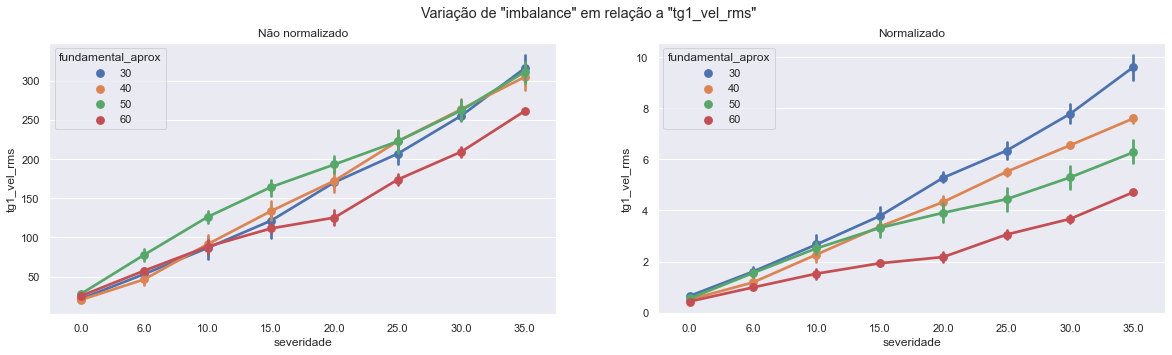

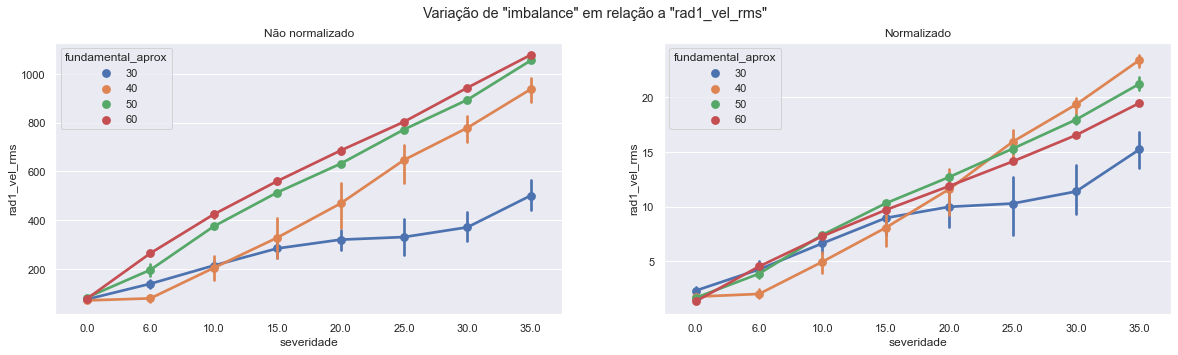

In [18]:
aux.plot_detailed_comparisson('tg1_vel_rms', 'imbalance', df_desbal, df_desbal_norm)
aux.plot_detailed_comparisson('rad1_vel_rms', 'imbalance', df_desbal, df_desbal_norm)

## Desalinhamento vertical

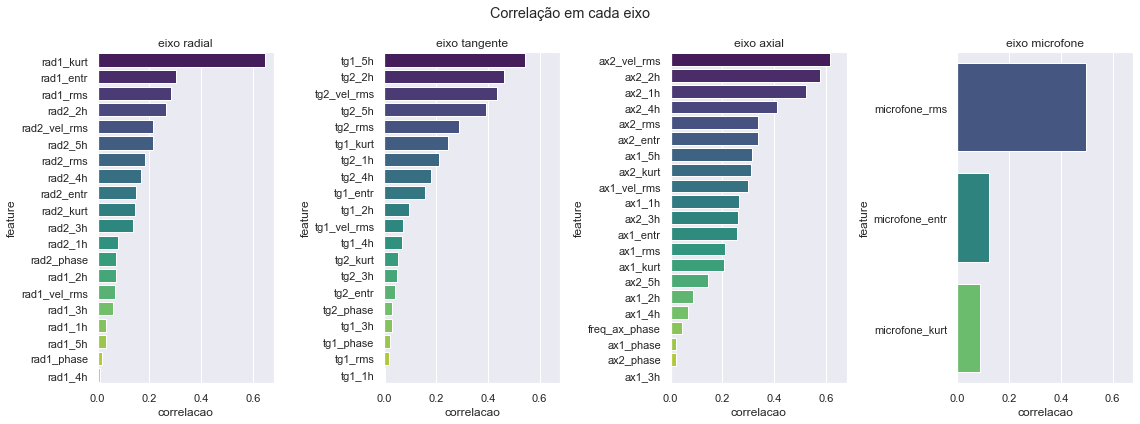

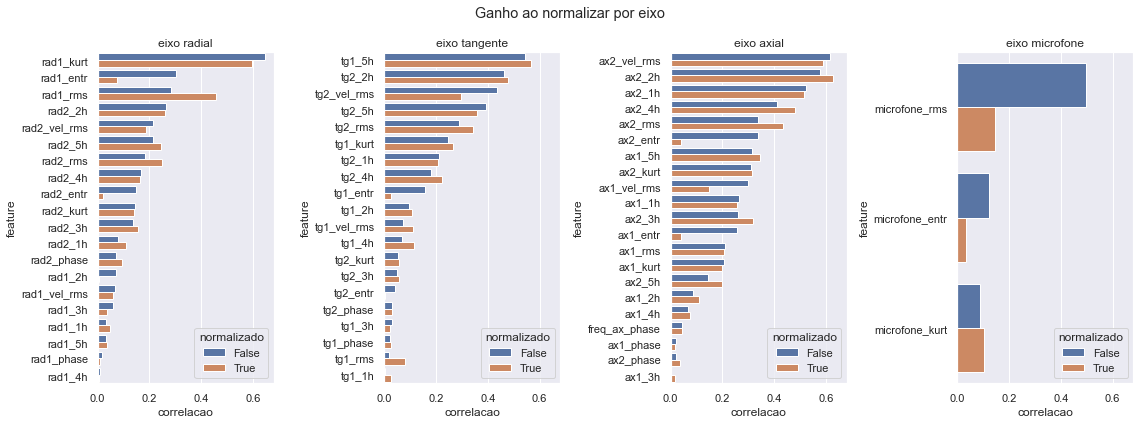

In [14]:
corr_df = aux.gera_corr_df('vertical-misalignment', df_des_ve, df_des_ve_norm, feat_to_eixo, feat_to_type)

aux.plot_correlations(corr_df)

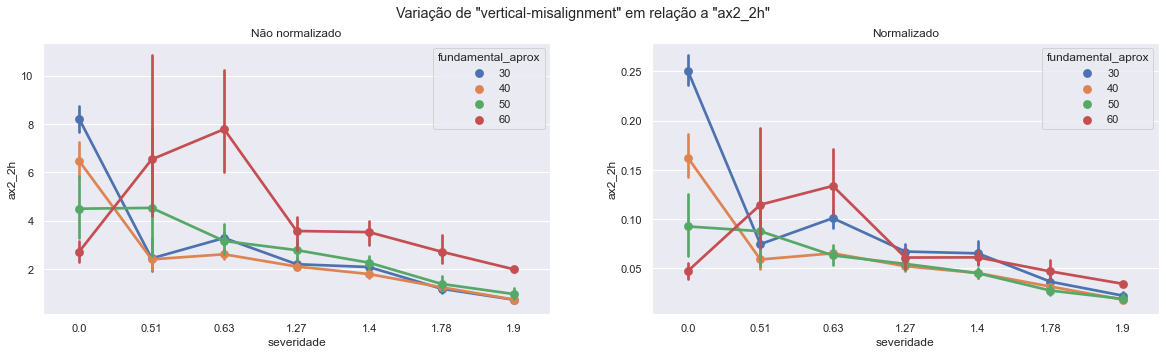

In [24]:
aux.plot_detailed_comparisson('ax2_2h', 'vertical-misalignment', df_des_ve, df_des_ve_norm)

## Desalinhamento horizontal

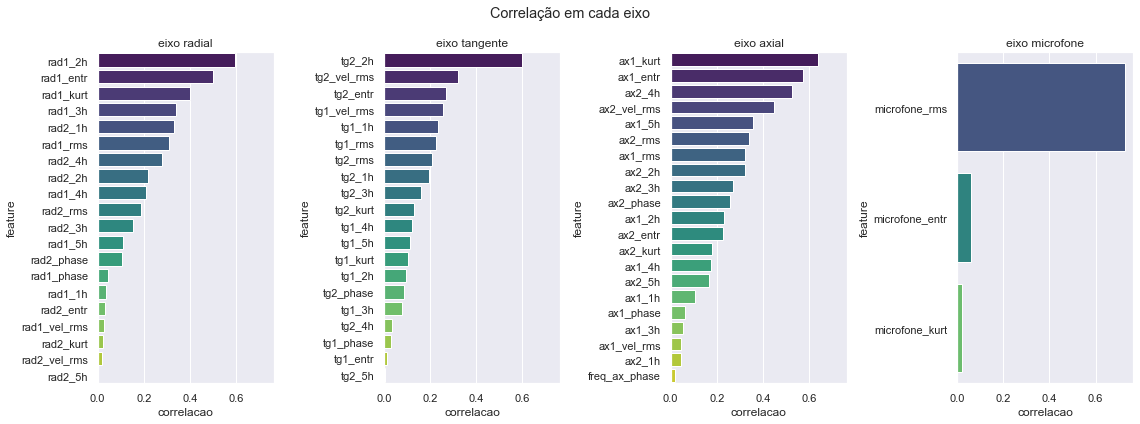

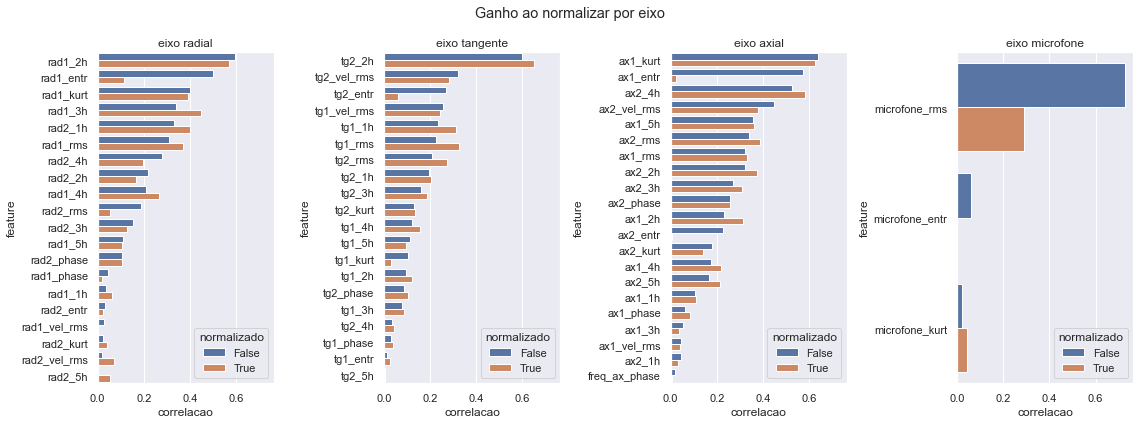

In [15]:
corr_df = aux.gera_corr_df('horizontal-misalignment', df_des_ho, df_des_ho_norm, feat_to_eixo, feat_to_type)

aux.plot_correlations(corr_df)

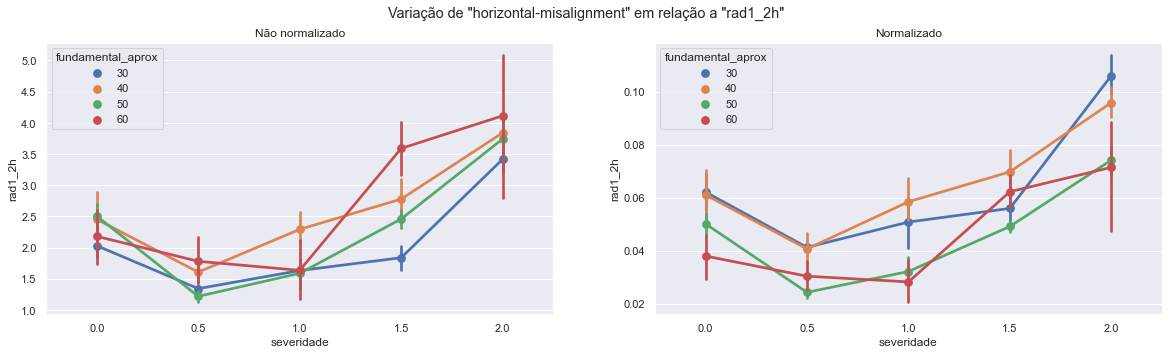

In [27]:
aux.plot_detailed_comparisson('rad1_2h', 'horizontal-misalignment', df_des_ho, df_des_ho_norm)

## Mudaças na correlação após normalização

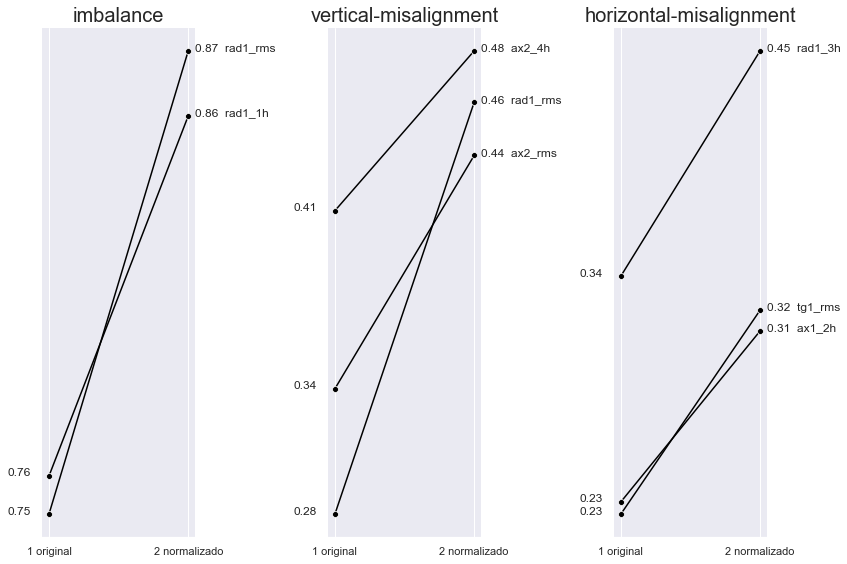

In [16]:
# plota maiores crescimentos 
fig, ax = plt.subplots(1, 3, figsize=(12, 8))

aux.plot_change_correlation('imbalance',          df_desbal, df_desbal_norm, ax=ax[0], cut=2)
aux.plot_change_correlation('vertical-misalignment',   df_des_ve, df_des_ve_norm, ax=ax[1])
aux.plot_change_correlation('horizontal-misalignment', df_des_ho, df_des_ho_norm, ax=ax[2])

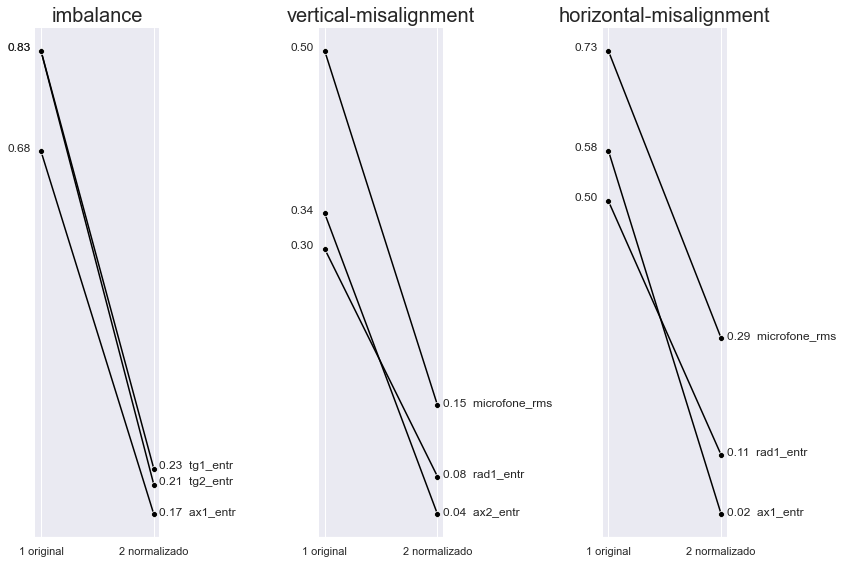

In [17]:
# plota maiores decrescimentos
fig, ax = plt.subplots(1, 3, figsize=(12, 8))

aux.plot_change_correlation('imbalance',          df_desbal, df_desbal_norm, decrescente=True, ax=ax[0])
aux.plot_change_correlation('vertical-misalignment',   df_des_ve, df_des_ve_norm, decrescente=True, ax=ax[1])
aux.plot_change_correlation('horizontal-misalignment', df_des_ho, df_des_ho_norm, decrescente=True, ax=ax[2])